In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [124]:
df.columns = ['hours_studied', 'previous_scores', 'extracurricular_activities', 'sleep_hours', 'sample_question_papers_practiced', 'performance_index']
df.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hours_studied                     10000 non-null  int64  
 1   previous_scores                   10000 non-null  int64  
 2   extracurricular_activities        10000 non-null  object 
 3   sleep_hours                       10000 non-null  int64  
 4   sample_question_papers_practiced  10000 non-null  int64  
 5   performance_index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [126]:
df.shape

(10000, 6)

In [127]:
df.isnull().sum()

hours_studied                       0
previous_scores                     0
extracurricular_activities          0
sleep_hours                         0
sample_question_papers_practiced    0
performance_index                   0
dtype: int64

In [128]:
df.isna().sum()

hours_studied                       0
previous_scores                     0
extracurricular_activities          0
sleep_hours                         0
sample_question_papers_practiced    0
performance_index                   0
dtype: int64

In [129]:
df.duplicated().sum()

127

In [130]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [131]:
df.describe()

,hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced,performance_index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [132]:
# Exchange yes or no for 0 and 1 in the extracurricular column
df["extracurricular_activities"] = df["extracurricular_activities"].apply(lambda x: 1 if x == "Yes" else 0)
df.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [133]:
df.eq(0).sum()

hours_studied                          0
previous_scores                        0
extracurricular_activities          4986
sleep_hours                            0
sample_question_papers_practiced     937
performance_index                      0
dtype: int64

In [134]:
df[df<0].sum()

hours_studied                       0.0
previous_scores                     0.0
extracurricular_activities          0.0
sleep_hours                         0.0
sample_question_papers_practiced    0.0
performance_index                   0.0
dtype: float64

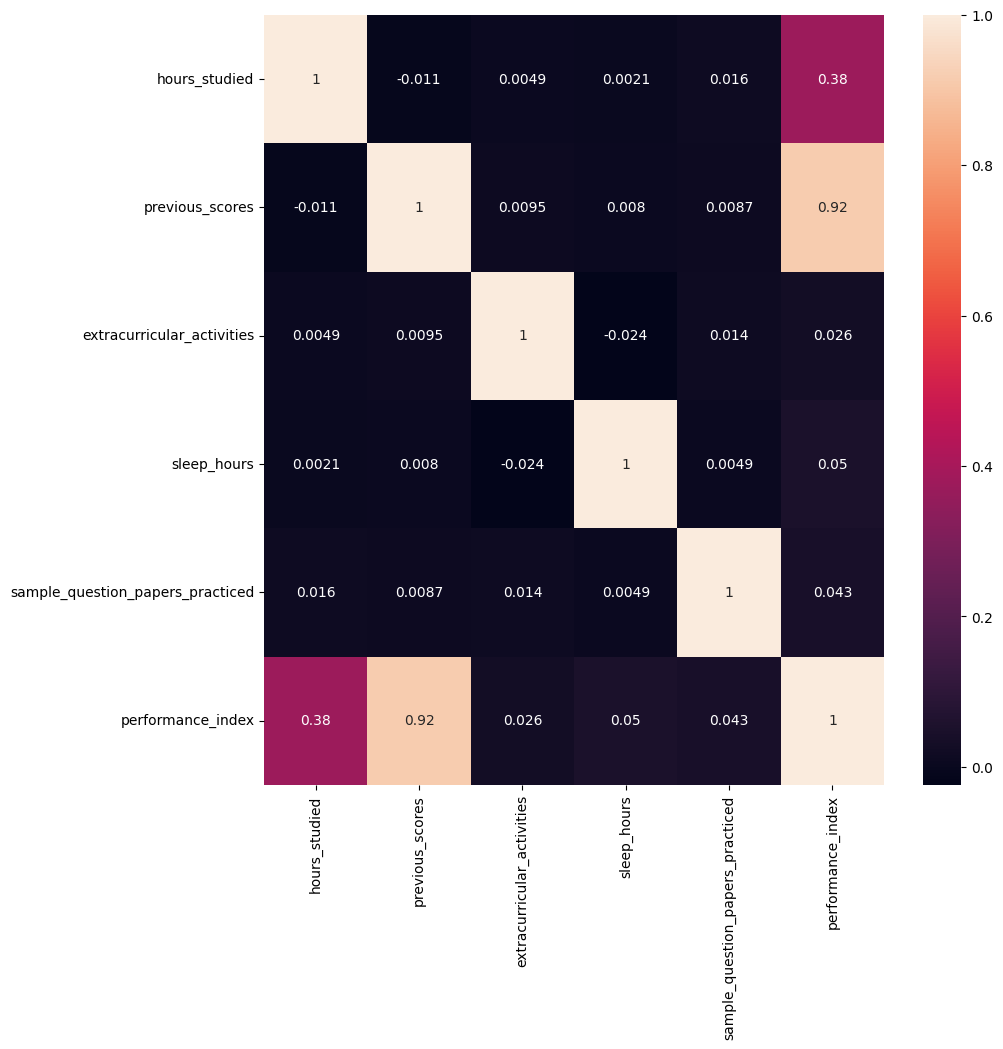

In [135]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True)

plt.show()

In [136]:
x = df.drop(['performance_index'], axis=1)
y = df['performance_index']

Text(0.5, 0, 'sample_question_papers_practiced')

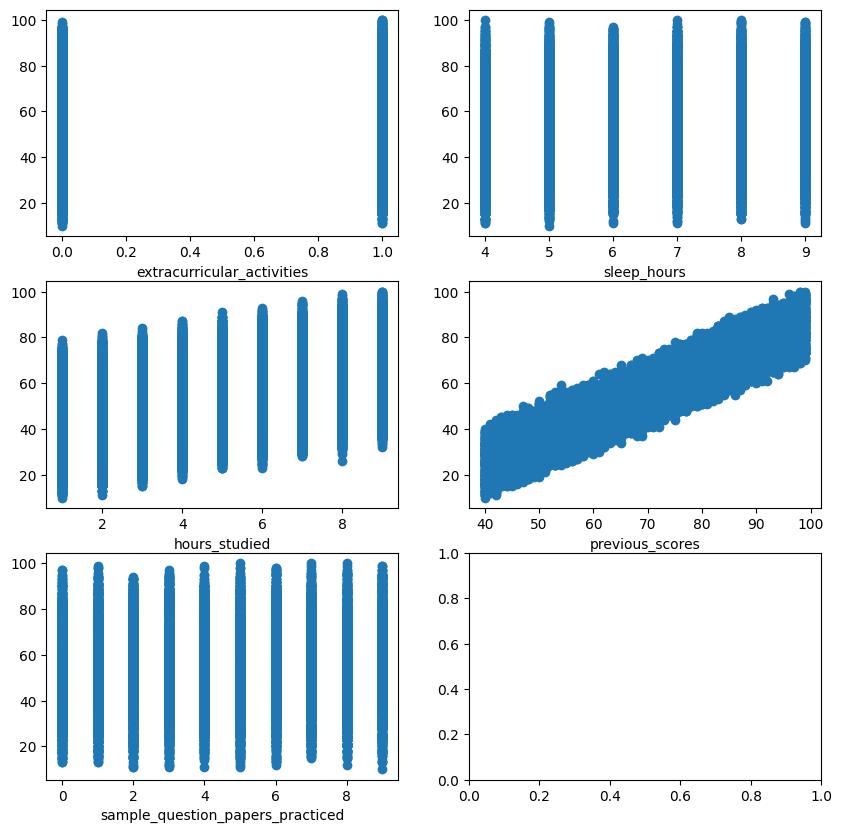

In [137]:
#Plots to show the linear relashionship between radius_mean and redundannt features
fig,ax = plt.subplots(3,2,figsize = (10,10))

ax[0,0].scatter(x['extracurricular_activities'],y)
ax[0,0].set_xlabel('extracurricular_activities')

ax[0,1].scatter(x['sleep_hours'],y)
ax[0,1].set_xlabel('sleep_hours')

ax[1,0].scatter(x['hours_studied'],y)
ax[1,0].set_xlabel('hours_studied')

ax[1,1].scatter(x['previous_scores'],y)
ax[1,1].set_xlabel('previous_scores')

ax[2,0].scatter(x['sample_question_papers_practiced'],y)
ax[2,0].set_xlabel('sample_question_papers_practiced')

In [138]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x.drop(['sample_question_papers_practiced','extracurricular_activities','sleep_hours'],axis=1),y,test_size=0.2,random_state=123)

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_predict = linear_model.predict(x_test)

r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

print(f"The R2 score is {r2}\nThe Mean Squared Error is {mse}\nThe adjusted R2 score is {r2adjusted}")


The R2 score is 0.9859301142592047
The Mean Squared Error is 5.362359963736291
The adjusted R2 score is 0.98591584459821


In [140]:
from sklearn.feature_selection import f_regression
# Compute F-statistics and p-values using f_regression from sklearn
f_stats, p_values = f_regression(x, y)

# Convert p-values to ANOVA table
num_features = x.shape[1]
anova_table = pd.DataFrame({'Feature': range(num_features), 'F-Stat': f_stats, 'p-value': p_values})
anova_table['Feature'] = [ x.columns[i] for i in range(num_features)]  # Naming the features
anova_table


,Feature,F-Stat,p-value
0,hours_studied,1618.585346,0.000000e+00
1,previous_scores,50863.230088,0.000000e+00
2,extracurricular_activities,6.715704,9.570825e-03
3,sleep_hours,25.090267,5.565559e-07
4,sample_question_papers_practiced,18.658435,1.578832e-05


In [141]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('performance_index ~ hours_studied + previous_scores + extracurricular_activities + sample_question_papers_practiced +sleep_hours', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
hours_studied,5.383278e+05,1.0,128837.795544,0.000000e+00
previous_scores,3.071836e+06,1.0,735181.388693,0.000000e+00
extracurricular_activities,9.377754e+02,1.0,224.437443,3.462555e-50
sample_question_papers_practiced,3.049914e+03,1.0,729.934822,3.721290e-155
sleep_hours,6.559767e+03,1.0,1569.946740,9.445646e-319
Residual,4.122766e+04,9867.0,NaN,NaN
